Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter, FixedLocator, MaxNLocator
                              

In [91]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1


In [0]:
total_votes = sum(df['1_votes'])

In [0]:
x = range(1,11)

total_votes = 0
for i in x:
  total_votes += sum(df['{}_votes'.format(i)])

y = []
for i in x:
  y.append(sum(df['{}_votes'.format(i)])/total_votes)

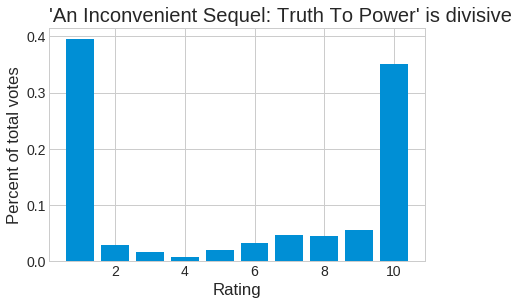

In [109]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#plt.style.use('seaborn-whitegrid')
#plt.figure(figsize=(8,5))
plt.bar(x, y);
plt.xlabel('Rating')
plt.ylabel('Percent of total votes')
plt.title("'An Inconvenient Sequel: Truth To Power' is divisive",
          loc='left');

text = 'IMDb ratings for the film as of Aug.29'
x_ticks = x
y_ticks = ['0', '10', '20', '30', '40%']

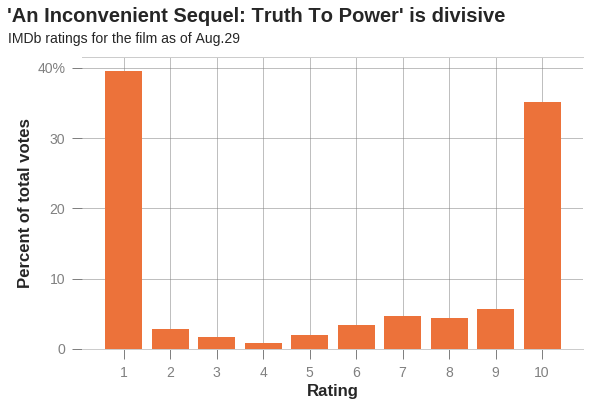

In [145]:
fig, ax = plt.subplots(figsize=(8,5));

ax.bar(x, y, color="#EC723A")
ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Percent of total votes', fontweight='bold')
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
          loc='left', fontweight='bold', x=-0.15, y=1.1);

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.set_yticklabels(y_ticks)
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors='grey', pad=7, grid_color='grey', grid_alpha=0.5)
ax.tick_params(axis='y', colors='grey', pad=7, grid_color='grey', grid_alpha=0.5)

ax.text(-1.5, 0.435,'IMDb ratings for the film as of Aug.29');
fig.savefig('IMDb Plot Copy.png', format='png', transparent=True)

In [147]:
#reproducing FiveThirtyEight VISUALIZATION
#Daily Show Guests

from IPython.display import display, Image

url = "https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png?w=1150"
example = Image(url=url, width = 500)

display(example)


In [190]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv")
df.head(10)

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier
5,1999,actor,1/19/99,Acting,William Baldwin
6,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe
7,1999,model,1/21/99,Media,Carmen Electra
8,1999,actor,1/25/99,Acting,Matthew Lillard
9,1999,stand-up comedian,1/26/99,Comedy,David Cross


In [191]:
df['Group'].unique()

array(['Acting', 'Comedy', 'Musician', 'Media', nan, 'Politician',
       'Athletics', 'Business', 'Advocacy', 'Political Aide', 'Misc',
       'Academic', 'Government', 'media', 'Clergy', 'Science',
       'Consultant', 'Military'], dtype=object)

In [192]:
df['Group'].value_counts(normalize=True)

Acting            0.349361
Media             0.282119
Politician        0.115702
Comedy            0.056349
Musician          0.046206
Academic          0.038693
Athletics         0.019534
Misc              0.016905
Government        0.015026
Political Aide    0.013524
Science           0.010518
Business          0.009391
Advocacy          0.009016
Consultant        0.006762
Military          0.006011
Clergy            0.003005
media             0.001878
Name: Group, dtype: float64

In [199]:
group1 = ['Acting', 'Comedy', 'Musician']
group2 = ['Media', 'media']
group3 = ['Politician', 'Political Aide', 'Government']

ACM = df[df.Group.isin(group1)] 
media = df[df.Group.isin(group2)]
GP = df[df.Group.isin(group3)]

temp = pd.concat([ACM,media])
new_df = pd.concat([temp, GP])
new_df

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier
...,...,...,...,...,...
2669,2015,nyc mayor,6/2/15,Politician,Bill de Blasio
2670,2015,united states senator,6/22/15,Politician,Al Franken
2678,2015,First Minister of Scotland,6/8/15,Politician,Nicola Sturgeon
2680,2015,United States Senator,7/1/15,Politician,Kirsten Gillibrand


In [202]:
ACM['YEAR'].value_counts(normalize=True)

1999    0.124688
2000    0.103907
2001    0.094763
2002    0.082294
2003    0.077307
2013    0.059019
2014    0.053200
2004    0.052369
2005    0.049875
2010    0.048213
2006    0.048213
2011    0.045719
2015    0.037406
2012    0.036575
2007    0.029925
2008    0.028263
2009    0.028263
Name: YEAR, dtype: float64

In [0]:
ACM_y = []
media_y = []
GP_y = []
for i in df['YEAR'].unique():
  data = df[df['YEAR'] == i].Group.value_counts(normalize=True)
  acm = 0
  media = 0
  gp = 0
  for i in data.index:
    if i in group1:
      acm+= data[i]
    if i in group2:
      media+= data[i]
    if i in group3:
      gp+= data[i]
  ACM_y.append(acm)
  media_y.append(media)
  GP_y.append(gp)


In [0]:
'''
ACM_y = ACM.YEAR.value_counts().sort_index().values
media_y = media.YEAR.value_counts().sort_index().values
GP_y = GP.YEAR.value_counts().sort_index().values

total = sum(ACM_y)+sum(media_y)+sum(GP_y)

ACM_y_norm = ACM_y/total
media_y_norm = media_y/len(df)
GP_y_norm = GP_y/len(df)

x = ACM.YEAR.value_counts().sort_index().index
'''

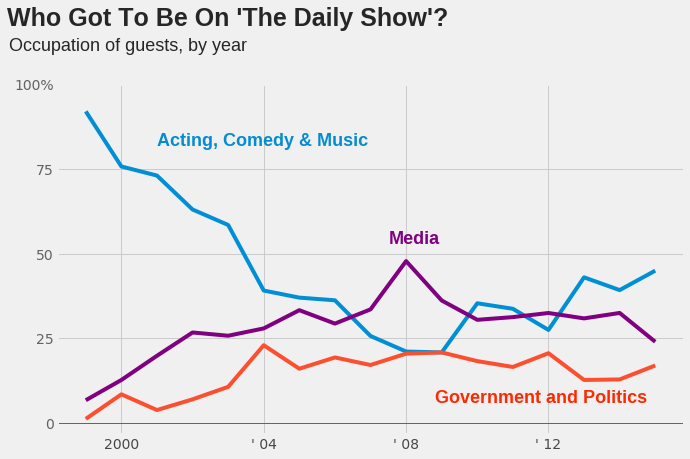

In [418]:
#plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(10,6))

ax.grid(True)
ax.plot(x, ACM_y, label='Acting, Comedy, and Music')
ax.plot(x, media_y, color='Purple', label='Media')
ax.plot(x, GP_y, label='Government and Politics')
ax.set_title("Who Got To Be On 'The Daily Show'?", loc='left', 
             fontweight='bold', fontsize=25, x=-0.08, y = 1.15);
ax.tick_params(which='major')
ax.tick_params(which='major')

ax.xaxis.set_major_locator(MultipleLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(0.25))

x_ticks = ['0', '2000', "' 04", "' 08", "' 12"]
y_ticks = ['0', '25', '50', '75', '100%']
ax.yaxis.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(x_ticks, color='black', fontfamily='Andale Mono', alpha=0.7);
ax.set_yticklabels(y_ticks, fontfamily='Andale Mono', alpha=0.7);

ax.text(1996.85, 1.1, 'Occupation of guests, by year', fontsize=18)
ax.text(2001, 0.82, "Acting, Comedy & Music", fontsize=18, fontweight='bold', 
       color='#058BD1')
ax.text(2007.5, 0.53, "Media", fontsize=18, fontweight='bold', 
        color='purple')
ax.text(2008.8, 0.06, "Government and Politics", fontsize=18, fontweight='bold', 
       color='#FC2901');
ax.axhline(color='black', linewidth=0.5);

In [14]:

ACM = df.Group.isin(group1)

0        True
1        True
2        True
3        True
4        True
        ...  
2688    False
2689    False
2690     True
2691     True
2692     True
Name: Group, Length: 2693, dtype: bool

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here